In [1]:
import os
import sys
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../lightning_logs"))

In [2]:
from utils_result import get_loss,get_standardised_loss
from plot import plot_bar_vertical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import median_absolute_error
from utils_result import *
from scipy import stats
from tqdm.auto import tqdm
tqdm.pandas()
from plot import plot_bar_horizontal,plot_bar_vertical,vertical_boxplot,horizontal_boxplot,create_MAD_comparison_boxplot,create_MAD_comparison_violinplot

In [3]:
pool_predictions_test = "../final_results/final_models/CONFIG=context,MODE=supervised,PRETRAIN=own,LR=0.001,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=none,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=128-64-32,DROPOUTMLP=0.0,ACTIVATIONMLP=tanh,TYPE=pool/version_0/predictions/test_loss=0.2282.csv"
pool_predictions_val = "../final_results/final_models/CONFIG=context,MODE=supervised,PRETRAIN=own,LR=0.001,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=none,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=128-64-32,DROPOUTMLP=0.0,ACTIVATIONMLP=tanh,TYPE=pool/version_0/predictions/val_loss=0.1017.csv"

In [4]:
df_test = pd.read_csv(pool_predictions_test, index_col=0)
df_val = pd.read_csv(pool_predictions_val, index_col=0)

In [5]:
def median_absolute_deviation(series, threshold=None):
    if threshold is not None and len(series) < threshold:
        return None
    return stats.median_abs_deviation(series.values)

# Looking at distributions difference truth and predictions

## With no comparison peptides

In [6]:
mad_test=df_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x)).dropna()
mad_val =df_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x)).dropna()

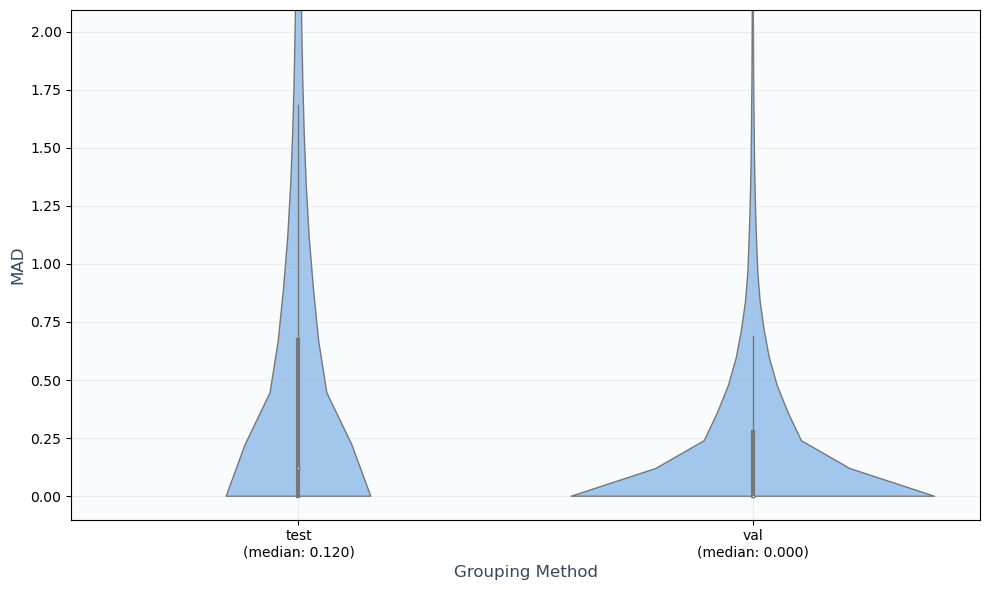

In [7]:
create_MAD_comparison_violinplot([mad_test,mad_val],["test","val"],title="",percentile_cutoff=0.95)

## Regular comparison

In [8]:
mad_test=df_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
mad_val=df_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

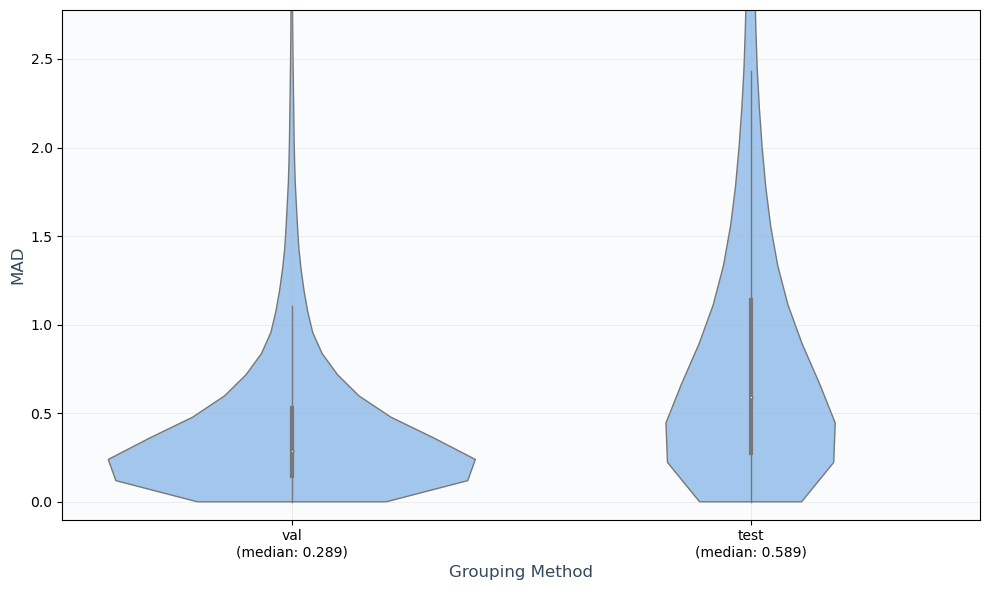

In [9]:
create_MAD_comparison_violinplot([mad_val,mad_test],["val","test"],title="",percentile_cutoff=0.95)

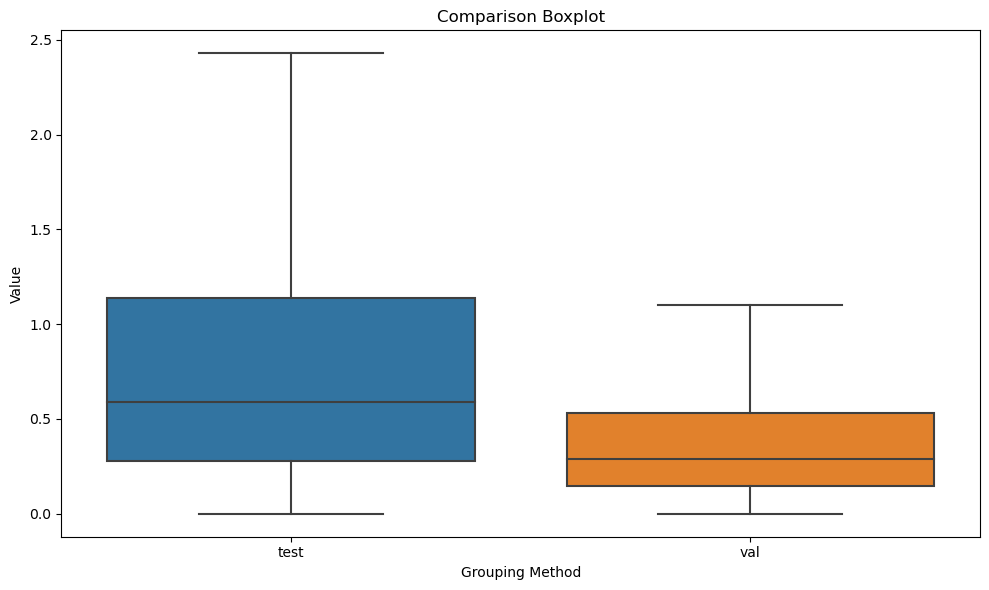

In [10]:
create_MAD_comparison_boxplot([mad_test,mad_val],["test","val"])

## Look for everything below 90th percentile

In [11]:
mad_test = df_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold_test = np.percentile(mad_test, 90)
indices_90_test =  mad_test[mad_test<=threshold_test].index
df_90_test = df_test[df_test['modified_sequence'].isin(indices_90_test)]

In [12]:
mad_val = df_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold_val = np.percentile(mad_val, 90)
indices_90_val =  mad_val[mad_val<=threshold_val].index
df_90_val = df_val[df_val['modified_sequence'].isin(indices_90_val)]

In [13]:
mad_test_90=df_90_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
mad_val_90=df_90_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

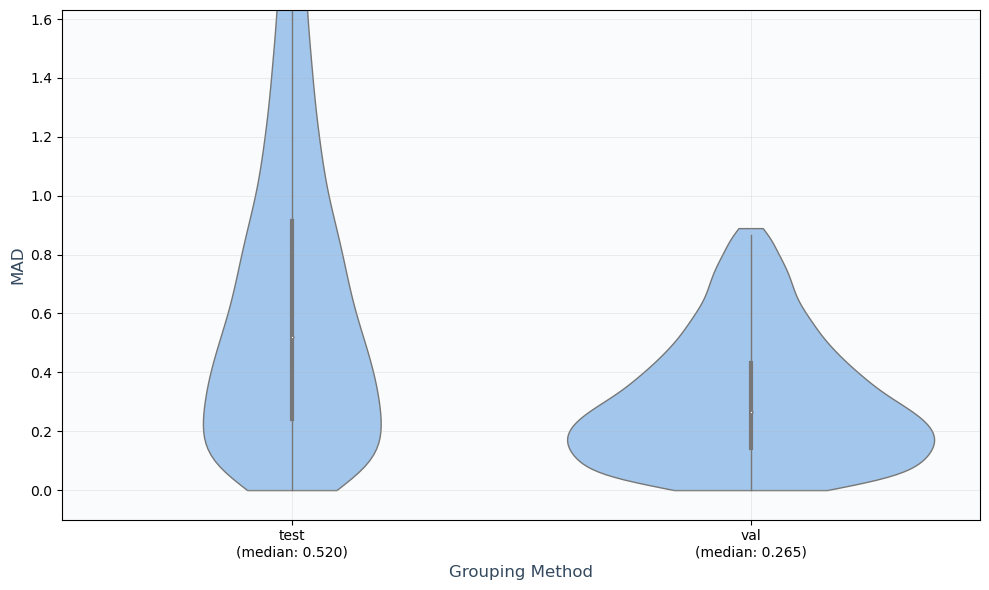

In [14]:
create_MAD_comparison_violinplot([mad_test_90,mad_val_90],["test","val"],percentile_cutoff=0.95)

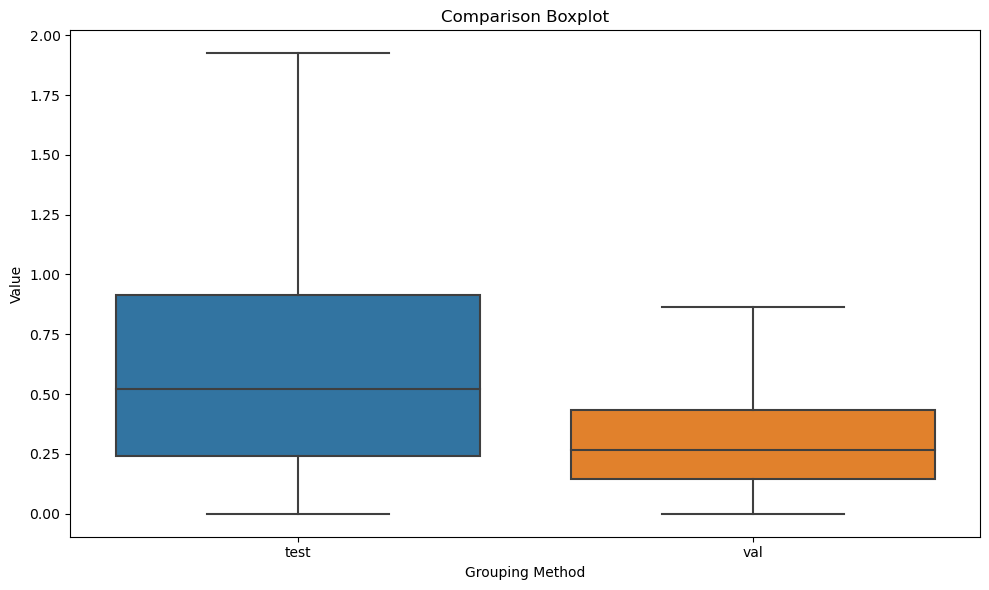

In [15]:
create_MAD_comparison_boxplot([mad_test_90,mad_val_90],["test","val"])

## Look for everything above 90th percentile

In [16]:
mad_test = df_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold_test = np.percentile(mad_test, 90)
indices_10_test =  mad_test[mad_test>=threshold_test].index
df_10_test = df_test[df_test['modified_sequence'].isin(indices_10_test)]

In [17]:
mad_val = df_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold_val = np.percentile(mad_val, 90)
indices_10_val =  mad_val[mad_val<=threshold_val].index
df_10_val = df_val[df_val['modified_sequence'].isin(indices_10_val)]

In [18]:
mad_test_10=df_10_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
mad_val_10=df_10_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

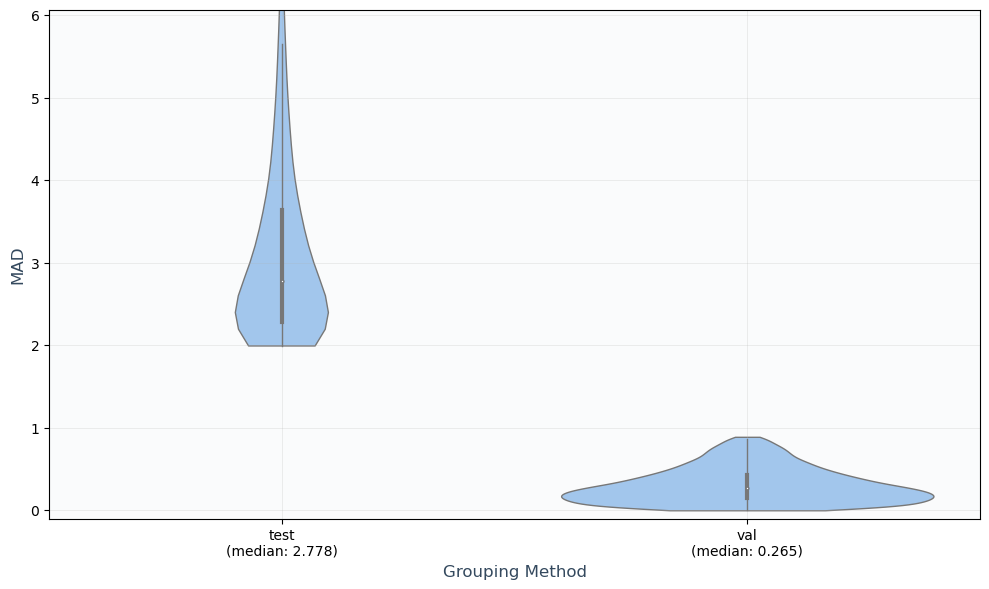

In [19]:
create_MAD_comparison_violinplot([mad_test_10,mad_val_10],["test","val"],percentile_cutoff=0.95)

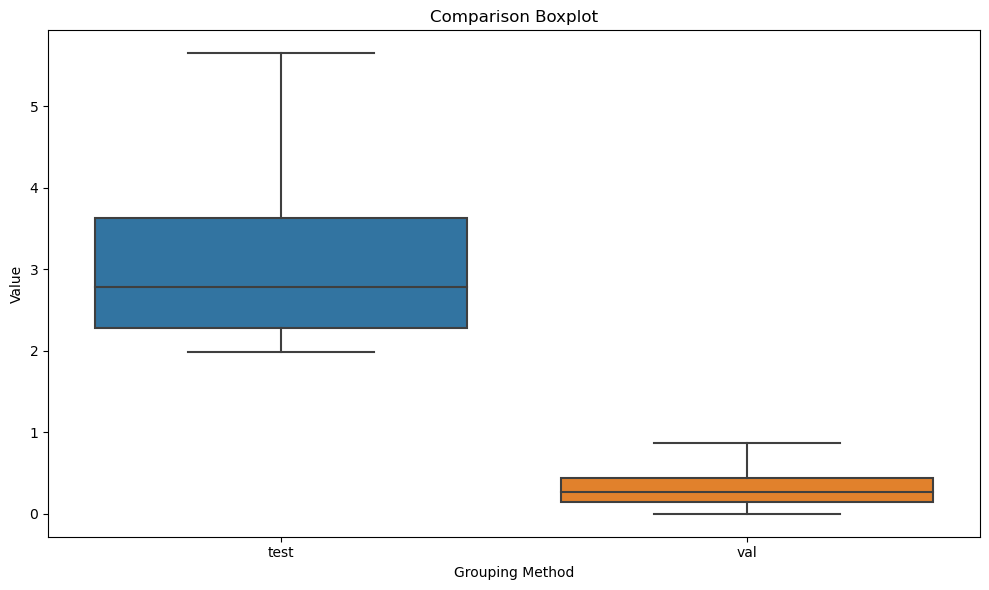

In [20]:
create_MAD_comparison_boxplot([mad_test_10,mad_val_10],["test","val"])